<a href="https://colab.research.google.com/github/bocekci/merve/blob/main/breastcanceripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns
import zipfile
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
tf.random.set_seed(3)

In [91]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
zip_file_path = "/content/drive/My Drive/Colab Notebooks/archive (16).zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/extracted")

In [93]:
waste_labels = {'benign': 0, 'malignant': 1, 'normal': 2}
target_size=(224,224)

In [94]:
import os
os.path.exists(zip_file_path )

True

In [95]:
def load_dataset(zip_file_path, target_size, waste_labels):
    x = []
    labels = []

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        image_paths = sorted(list(zip_ref.namelist()))
        for image_path in image_paths:
            img_data = zip_ref.read(image_path)
            nparr = np.frombuffer(img_data, np.uint8)
            img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
            img = cv2.resize(img, target_size)
            x.append(img)
            label = os.path.basename(os.path.dirname(image_path))
            labels.append(waste_labels[label])

    x, labels = shuffle(x, labels, random_state=42)
    print(f"X boyutu: {np.array(x).shape}")
    print(f"Label sınıf sayısı: {len(np.unique(labels))} Gözlem sayısı: {len(labels)}")

    return x, labels
zip_file_path = "/content/drive/My Drive/Colab Notebooks/archive (16).zip"
target_size = (224, 224)
waste_labels = {'benign': 0, 'malignant': 1, 'normal': 2}

x, labels = load_dataset(zip_file_path, target_size, waste_labels)


X boyutu: (1578, 224, 224, 3)
Label sınıf sayısı: 3 Gözlem sayısı: 1578


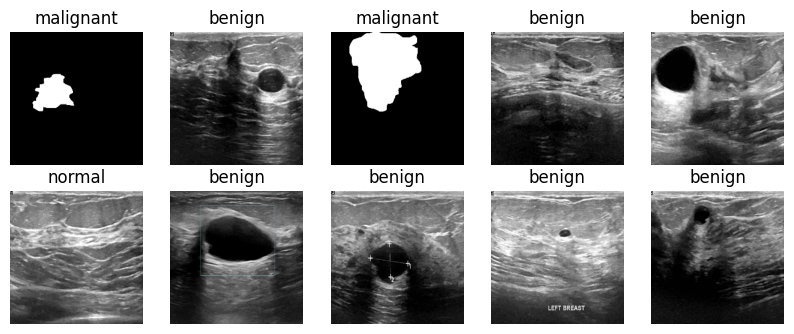

In [96]:
def visualize_image(image_batch, labels_batch, waste_labels):
    plt.figure(figsize=(10, 10))
    for n in range(10):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(image_batch[n])
        plt.title(list(waste_labels.keys())[labels_batch[n]])
        plt.axis('off')
visualize_image(x, labels,waste_labels)


In [97]:
train = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)


In [100]:
extracted_dir = "/content/extracted"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


train_generator = train.flow_from_directory(
    directory=extracted_dir,
    target_size=target_size,
    class_mode='categorical',
    subset='training'
)


test_generator = test.flow_from_directory(
    directory=extracted_dir,
    target_size=target_size,
    batch_size=251,
    class_mode='categorical',
    subset='validation'
)


Found 1421 images belonging to 1 classes.
Found 157 images belonging to 1 classes.


In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [111]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))

model = Sequential()

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=num_classes, activation='softmax'))


In [112]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [113]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 42s 921ms/step - loss: 1.3425 - accuracy: 0.9216 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 2/5
40/40 [==============================] - 33s 790ms/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 2.2430e-05 - val_accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 33s 807ms/step - loss: 0.0787 - accuracy: 0.9952 - val_loss: 2.9026e-06 - val_accuracy: 1.0000
Epoch 4/5
40/40 [==============================] - 33s 799ms/step - loss: 0.0061 - accuracy: 0.9968 - val_loss: 2.9632e-07 - val_accuracy: 1.0000
Epoch 5/5
40/40 [==============================] - 33s 783ms/step - loss: 0.0191 - accuracy: 0.9968 - val_loss: 1.0975e-08 - val_accuracy: 1.0000


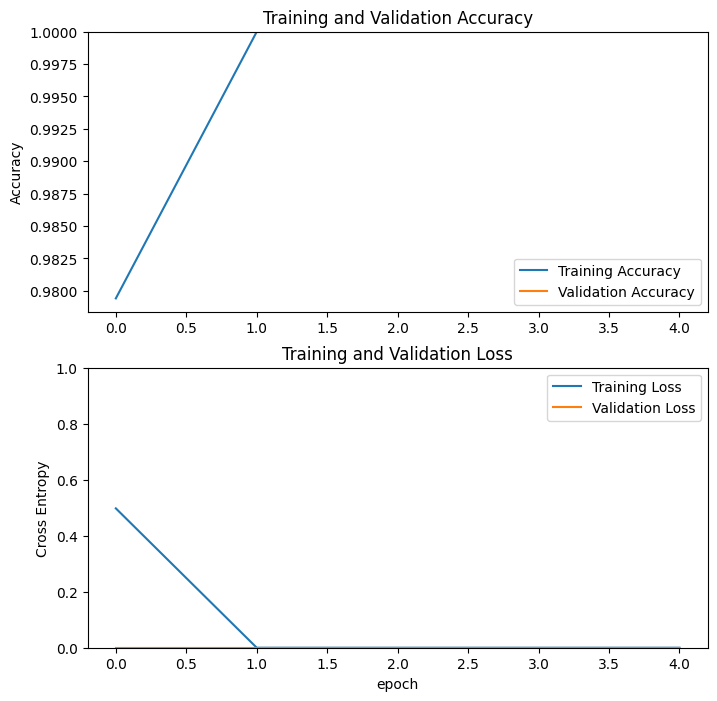

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()